# HOMEWORK 5

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from networkx.algorithms import centrality
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
import collections
import random
import igraph
import scipy

## 1. Data


In [ ]:
hero_net  = pd.read_csv('hero-network.csv')

### 1.2 Data Preprocessing

Drop rows where the same hero appears in the both columns hero1 and hero2

In [ ]:
hero_net.drop(hero_net[hero_net['hero1'] == hero_net['hero2']].index,inplace=True)

Modify heroes names in both columns hero1, hero2 by removing spaces and slash at the end of the name


In [ ]:
hero_net['hero1'] = hero_net.apply(lambda  row :  row['hero1'].rstrip().rstrip('/'),axis=1)

In [ ]:
hero_net['hero2'] = hero_net.apply(lambda  row :  row['hero2'].rstrip().rstrip('/'),axis=1)

Replace the hero name 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER'

In [ ]:
hero_net['hero1'] = hero_net.apply(lambda row :  'SPIDER-MAN/PETER PARKER' if(row['hero1'] == 'SPIDER-MAN/PETER PAR') else row['hero1'],axis=1)

In [ ]:
hero_net['hero2'] = hero_net.apply(lambda row :  'SPIDER-MAN/PETER PARKER' if(row['hero2'] == 'SPIDER-MAN/PETER PAR') else row['hero2'],axis=1)

In [ ]:
len(hero_net[hero_net['hero2'] =='SPIDER-MAN/PETER PAR' ])

0

Save pre-processed dataframe in the file hero.csv

In [ ]:
hero_net.to_csv('hero.csv',index=False)

### First Graph

Load pre-processed hero.csv dataframe

In [ ]:
# hero_net = pd.read_csv('hero.csv')

In [ ]:
hero_net.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [ ]:
len(hero_net)

572235

Group the rows by the values in the tuple created from the columns hero1 and hero2 and add the count 

In [ ]:
new = hero_net.groupby(['hero1','hero2']).hero2.count().reset_index(name="count") 

In [ ]:
new.head()

,hero1,hero2,count
0,24-HOUR MAN/EMMANUEL,"FROST, CARMILLA",1
1,24-HOUR MAN/EMMANUEL,KILLRAVEN/JONATHAN R,1
2,24-HOUR MAN/EMMANUEL,M'SHULLA,1
3,3-D MAN/CHARLES CHAN,ANGEL/WARREN KENNETH,1
4,3-D MAN/CHARLES CHAN,ANT-MAN II/SCOTT HAR,1


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224099 entries, 0 to 224098
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   224099 non-null  object
 1   hero2   224099 non-null  object
 2   count   224099 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


Create the graph G1 from the given dataframe after its rows have been grouped together

In [ ]:
G1 = nx.Graph()

In [ ]:
new.apply(lambda row :  G1.add_edge(row['hero1'],row['hero2'],weight=1/row['count']),axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
224094    None
224095    None
224096    None
224097    None
224098    None
Length: 224099, dtype: object

In [ ]:
nx.info(G1)

/tmp/ipykernel_98584/968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 6421 nodes and 167100 edges'

In [ ]:
len(new)

224099

### Second Graph

Load nodes.csv and edges.csv datarames

In [ ]:
nodes  = pd.read_csv('nodes.csv')

In [ ]:
edges  =pd.read_csv('edges.csv')

In [ ]:
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [ ]:
nodes['node'] = nodes.apply(lambda row : 'SPIDER-MAN/PETER PARKER' if row['node'] == 'SPIDER-MAN/PETER PARKERKER' else row['node'],axis = 1)

In [ ]:
edges['hero']  = edges.apply(lambda row : 'SPIDER-MAN/PETER PARKER' if row['hero'] == 'SPIDER-MAN/PETER PARKERKER' else row['hero'],axis = 1)

In [ ]:
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


Create graph G2 adding all nodes from the rows of nodes dataframe, saved in nodes.csv : nodes name is from the value of the column 'node' with attribute type guven by the value of the column 'type'

In [ ]:
G2 = nx.Graph()

In [ ]:
nodes.apply(lambda row :  G2.add_node(row['node'],type = row['type']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
19085    None
19086    None
19087    None
19088    None
19089    None
Length: 19090, dtype: object

Add all the edges of the graph G2 from the rows of the dataframe edges in the edges.csv file

In [ ]:
edges.apply(lambda row :  G2.add_edge(row['hero'],row['comic']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
96099    None
96100    None
96101    None
96102    None
96103    None
Length: 96104, dtype: object

In [ ]:
nx.info(G2)

/tmp/ipykernel_98584/1976782796.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G2)


'Graph with 19090 nodes and 96104 edges'

Check G2 number of nodes

In [ ]:
len(nodes)

19090

In [ ]:
len(G2.nodes)

19090

## 2. Backend Implementation

**Top N heroes:** The top N heroes who have appeared in the most number of comics. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

In [ ]:
def top_N_heroes(G2, N):
    #Dictionary where key is the hero name and value the number of comics in which appeared
    appearances = {node:G2.degree(node) for node in G2.nodes if G2.nodes[node]['type'] == 'hero'}
    #Take the heroes with the number of comics by casting the dictionary in to a Counter object
    collab  = collections.Counter(appearances).most_common(N)
    collab  ={x:v for x,v in collab} #cast counter back to dictionary
    top_N_heroes  = collab.keys() #List of the names of the Top N heores
    return top_N_heroes

In [ ]:
top_N_heroes(G2, 10)

dict_keys(['SPIDER-MAN/PETER PARKER', 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'HUMAN TORCH/JOHNNY S', 'MR. FANTASTIC/REED R', 'HULK/DR. ROBERT BRUC', 'WOLVERINE/LOGAN', 'INVISIBLE WOMAN/SUE'])

In [ ]:
def subgraph(graph, N):
    if graph == G1:
        appearances = {node:graph.degree(node) for node in graph.nodes}
        collab  = collections.Counter(appearances).most_common(N)
        collab  ={x:v for x,v in collab}
        top_N_heroes  = collab.keys()
        sub_G = graph.subgraph(top_N_heroes)
    if graph == G2:
        appearances = {node:graph.degree(node) for node in graph.nodes}
        collab  = collections.Counter(appearances).most_common(N)
        collab  ={x:v for x,v in collab}
        top_N_heroes  = collab.keys()
        sub_G = nx.Graph()
        for i in top_N_heroes:
            sub_G.add_node(i)
        for edge in G2.edges():
            if ((edge[0] in top_N_heroes) and (edge[1] not in top_N_heroes)) or ((edge[1] in top_N_heroes) and (edge[0] not in top_N_heroes)):
                sub_G.add_edge(edge[0],edge[1])
    return sub_G

In [ ]:
nx.info(subgraph(G2,10))

C:\Users\Marco\AppData\Local\Temp\ipykernel_20396\795869180.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(subgraph(G2,10))


'Graph with 6059 nodes and 10136 edges'

In [ ]:
top_N_heroes  = top_N_heroes(G2,20)

In [ ]:
black_list =  [ node for node in list(G1.nodes()) if node not in top_N_heroes] # Non top N heroes

In [ ]:
len(black_list)

6401

### Functionality 1 -  extract the graph's features


**INPUT**\
*graph* -> graph containg the data of the top N heroes\
*graph_type* -> integer to flag the type of the graph, if 1 flags the first graph G1,otherwise is flags the second graph G2\
**OUTPUT**\
Returns a dictionary containing all the graph's given in input features, requested by the task\

In [ ]:
def get_graph_features(graph,graph_type):
    features = {} #initialize features dictionary
    n_nodes  = nx.number_of_nodes(graph) 
    features['number_of_nodes']  = n_nodes #number of nodes
    density  = nx.density(graph)
    features['density']  = density #graph density
    degree_sequence = sorted((d for n,d in graph.degree()),reverse=True)
    degrees =  np.array(degree_sequence)
    percentile  = np.percentile(degrees,95)  #95 percentile node degree
    if(graph_type==1): #check for graph type
        collaborations  = { node : graph.degree(node)  for node in graph.nodes()} #Collaborations dictionary
        features['collaborations']  = collaborations 
        features['hubs']  = [ node for node in graph.nodes() if graph.degree(node) > percentile ] #List of Hubs node of the first graph
    else:
       appearances=  {node  : graph.degree(node) for node in graph.nodes if graph.nodes[node]['type'] == 'comic' } #Appearance dictionary
       features['appearances']  = appearances
       features['hubs']  = [ node for node in graph.nodes() if graph.degree(node) > percentile and graph.nodes[node]['type'] == 'comic'] #List of Hubs node of the second graph
    features['degree_dist']  = degree_sequence #Degree Distribution
    features['average_degree']  = round(sum(degree_sequence)/len(degree_sequence)) #Average Degree
    n  = len(graph.nodes())
    if( (n*(n-1))/2 - len(graph.edges()) < ((n*n-1)/2)/1000): #Check if the graph is dense or sparse
        is_dense = True
    else:
        is_dense  = False
    features['is_dense']  = is_dense
    return features

In [ ]:
G1.remove_nodes_from(black_list) #Top_N_heores graph
G1_features  =get_graph_features(G1,1) #First Graph Features

In [ ]:
G2_features  = get_graph_features(G2,2) # Second Graph Features

### Functionality 2 - Find top superheroes!

Centrality analysis is a set of techniques used to identify the most important nodes in a graph or network. A node is considered "central" if it has a high degree of connectivity, meaning it is connected to many other nodes in the network. There are several different measures of centrality that can be used, each of which looks at a different aspect of the node's connectivity and importance within the network.

Some common measures of centrality include:

Degree centrality: This measure looks at the number of connections a node has to other nodes in the network. Nodes with a high degree of centrality have many connections to other nodes, and are therefore considered central.

degree centrality(i) = number of arcs incident on node i / (total number of arcs in the graph - 1)

Betweenness centrality: This measure looks at the number of shortest paths between two nodes that pass through a particular node. Nodes with a high betweenness centrality are considered important because they are "bridges" between other nodes in the network.

Betweenness centrality(i) = Σ(s ≠ i ≠ t) / (s,t ∈ V) (σst / σst)
where:
- V is the set of nodes of the graph
- s and t are any two nodes in the graph
- σst is the number of minimum paths between s and t
- σst is the number of paths passing through node i between s and t

Closeness centrality: This measure looks at the distance from a particular node to all other nodes in the network. Nodes with a high closeness centrality are considered central because they are close to many other nodes in the network.

closeness centrality(i) = 1 / (sum of distances of i from all other nodes)


PageRank: this measure  identify the most important nodes based on the structure of the graph. It is based on the number and quality of the connections.

PageRank(p) = (1 - d) + d * (Sigma(PageRank(q) / number of outgoing links of q))
where:
- d is a constant representing the "damping factor," usually set to a value between 0 and 1.
- q is a page pointing to p
- PageRank(q) is the PageRank of the page q
- number of outgoing links of q is the number of links on page q pointing to other pages

Let's build a function that has in input the graph (G1 or G2), a node, one of the four proposed metrics, the N number of top superheroes that we want to consider and the graph G2 that we need to find the top N superheroes.

In [ ]:
def centralities(graph, node, metrics, N, G2):
    
    # First of all we create a dictionary and we save the type of metric and the node, after we inizialize a variable (tot)
    #in zero and we create a subgraph given the graph in input and the N superheroes that we take in consideration.
    measures = {}
    measures["Metrics"] = metrics
    measures["Node"] = node
    tot = 0
    top_graph = subgraph(graph, N)
    top_heroes = top_N_heroes(G2, N)

    # If the node is in the subgraph, N is bigger than zero, we check the type of metrics that we need to use:
    if node in top_graph.nodes():
        if N >0:
            
            #Type: Degree Centrality
            if metrics == "DegreeCentrality":
                # This function calculate the values
                centrality = nx.degree_centrality(top_graph)
                # We create a cicle to scroll the centrality in all the nodes
                for nodes, centrality in centrality.items():
                    # If the node that we are iterating is the same of the one in input we save the value in our dictionary
                    if nodes == node:
                        measures["Value"] = centrality
                    # we sum all the values of the heroes nodes to compute the average
                    if nodes in top_heroes:
                        tot = tot + centrality 
                        
            #Type: Betweeness
            elif metrics == "Betweeness":
                centrality = nx.betweenness_centrality(top_graph)
                for nodes, centrality in centrality.items():
                    if nodes == node:
                        measures["Value"] = centrality
                    if nodes in top_heroes:
                        tot = tot + centrality
            
            #Type: Closeness Centrality
            elif metrics == "ClosenessCentrality":
                centrality = nx.closeness_centrality(top_graph)
                for nodes, centrality in centrality.items():
                    if nodes == node:
                        measures["Value"] = centrality
                    if nodes in top_heroes:
                        tot = tot + centrality
                  
            #Type: Page Rank
            elif metrics == "PageRank":
                centrality = nx.pagerank(top_graph)
                for nodes, centrality in centrality.items():
                    if nodes == node:
                        measures["Value"] = centrality
                    if nodes in top_heroes:
                        tot = tot + centrality
            else:
                raise ValueError("Metric not valid")
        else:
            raise ValueError("N is not a positive integer")

        # Let's compute the average in the network the metric that we considered and let's add it in the dictionary
        average = tot/len(top_graph)
        measures["Average"] = average

    else:
        raise ValueError("The node is not in the graph ")
     
    return measures

In [ ]:
centrality = centralities(G2,'CAPTAIN AMERICA',"ClosenessCentrality",50, G2)

In [ ]:
centrality

{'Metrics': 'ClosenessCentrality',
 'Node': 'CAPTAIN AMERICA',
 'Value': 0.3909143705233271,
 'Average': 0.0006201732264021322}

### Functionality 3 - Shortest ordered Route

Let's build a function that has in input the graph (Attention this function work only with the graph type == G2), the heroes, the first hero of the sequence, the last hero of the sequence and the N heroes that we want to consider. 

The goal is to implement an algorithm that returns the shortest walk going from a node h_j to a node h_n passing through nodes h in order.

In [ ]:
def shortest_ordered_route(graph, heroes, first_hero, last_hero, N):
    
    if graph == G2:
        if N >0:
            # Let's add at the beginning of the sequence the first hero and the end of the sequence the last hero.
            # After we inizialize a list and a dictionary.
            heroes.append(last_hero)
            heroes.insert(0, first_hero)
            route = []
            short_route = {}

            # Let's do a for cicle in the heroes sequences
            for h in range(len(heroes)-1):

                # We compute the shortest path between the hero h and the hero h+1
                try:
                    path = nx.shortest_path(graph, heroes[h], heroes[h+1])

                # If there is no path because the graph is not connected we add in the dictionary and return the advise
                #"There is no such path".
                except:
                    attention = "There is no such path"
                    short_route["Attention"] = attention
                    return short_route

                # If all the nodes are connect we create a for cicle in "path" that contains all the sequence in order
                # with the heroes and the comics.
                for i in path:
                    # If i is not in heroes and so it is a comic we append it in the list route
                    if i not in heroes:
                        route.append(i)

            # let's add all the sequence of the comics in a dictionary and let's create a graph adding
            # the heroes and comics nodes.
            short_route["Comics in order"] = route
            my_graph = nx.DiGraph()
            my_graph.add_nodes_from(heroes)
            my_graph.add_nodes_from(route)

            # Let's do a for cicle, in this way we create edges between the comics and the previous and next heroes
            # that follow each other in the graph.
            for i in range(len(route)):
                my_graph.add_edge(heroes[i], route[i])
                my_graph.add_edge(route[i], heroes[i+1])

            # We color the nodes in green if they are superheroes and in orange if they are comics
            colors = {node: 'green' if node in heroes else 'orange' for node in my_graph.nodes}
            node_colors = [colors[node] for node in my_graph.nodes]

            # we save in box all the comics in order, the graph and the colors.
            box = [short_route, my_graph, node_colors]

        else:
            raise ValueError("N is not a positive integer")
    else:
        raise ValueError("The graph is not G2")
    return box

In [ ]:
short_routes = shortest_ordered_route(G2, [ "SPIDER-MAN/PETER PARKER",'HAWK',"IRON MAN/TONY STARK",'DR. STRANGE/STEPHEN',"CAPTAIN AMERICA"], 'HULK/DR. ROBERT BRUC', "THOR/DR. DONALD BLAK", 50)

### Functionality 4 - Disconnecting Graphs

We start by defining the function to reduce the graph to the top *N* heores.

In [ ]:
def graph_n(graph:nx.Graph, N=None):
    """ Function to redute the graph to only the top N heroes """
    if N is None:
        return graph
    edges = pd.read_csv("edges.csv")
    h = edges.groupby("hero").count()   # extract the top n heroes
    
    top_n = h.sort_values(by="comic", ascending=False).head(N).index  # to a list
    n = edges[edges.hero.isin(top_n)]["comic"].to_list() # comic nodes that are linked to those heroes
    new_graph = graph.subgraph(top_n.to_list() + n).copy()    # create a subgraph based on the list
    return new_graph

Then we leverage it in the *function_4* in order to disconnect the graph given heroA and heroB as inputs.

In [ ]:
def function_4(graph:nx.Graph, heroA, heroB, N=None, edges=False):
    """ Returns minimum set of links to disconnect heroA and heroB"""
    G = graph_n(graph, N)
    cut_set = nx.minimum_edge_cut(G, heroA.upper(), heroB.upper())
    if edges:
        return cut_set  # return the list of edges
    return len(cut_set) # return the number of edges

Trying the function with top 100 heroes:

In [ ]:
function_4(G1,"CAPTAIN AMERICA","MR. FANTASTIC/REED R", 100)

78

### Functionality 5 - Extracting Communities

Our implementation of the Girvan-Newman algorithm:

In [ ]:
def girvan_newman(graph:nx.Graph, n_comunities=2) -> tuple[int, list]:
    """Implementation of the Girvan-Newman algorithm based on EBC"""
    counter = 0
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count < n_comunities):   # While the graph is connected (or with less communities than expected)

        cent = nx.edge_betweenness_centrality(graph)   # Compute EBC
        node_1, node_2 = sorted(cent.items(), key=lambda item: item[1], reverse = True)[0][0]    # Take the edge with highest EBC
        graph.remove_edge(node_1, node_2)   # Remove the edge
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)    # Check the components
        counter += 1 
    c = [community for community in nx.connected_components(graph)]
    return counter, c

In [ ]:
def function_5(graph:nx.Graph, Hero_1, Hero_2, N=None, n_comunities=2) -> tuple[int, list, bool]:
    is_same_group = False
    n, comunities = girvan_newman(graph, n_comunities)
    for c in comunities:
        if Hero_1 in c and Hero_2 in c:
            is_same_group = True
            break
    return n, comunities, is_same_group

## 3. Frontend Visualization

### Visualization 1 - Visualize some features of the network

**INPUT**\
*features* ->dictionary containing all the graph features given by get_graph_feature function\
*graph_type* -> integer to flag the type of the graph, if 1 flags the first graph G1,otherwise is flags the second graph G2\
**OUTPUT**\
Plots the graph features in the format or plot requested by the task\

In [ ]:
def visualize_features(features,graph_type):
    #First Features table
    table  = '| Feature | Values |\n'
    table += '| ------- | ------- |\n'
    table += '| Number_of_nodes |'+ str(features['number_of_nodes'])+'|\n'
    table += '| Density |'+ str(round(float(features['density']),4))+'|\n'
    table += '| Average_degree |'+ str(features['average_degree'])+'|\n'
    table += '| Is_dense |'+ str(features['is_dense'])+'|\n'
    display(Markdown(table))
    #Hubs table
    table = '| Hubs |\n'
    table += '|-----|\n'
    for node in features['hubs'][:20]:
        table+='|'+str(node)+'|\n'
    table+='|... '+str(len(features['hubs']))+' total hubs |'
    display(Markdown(table))

    if(graph_type==1):
        #plot of Number of collaborations of each hero in descending order
        collab  = {k:v for k,v in sorted(features['collaborations'].items(), key =  lambda item : item[1],reverse=True)}
        plt.figure(figsize=(30, 6), dpi=100)
        plt.title('Number of collaborations of each hero in descending order')
        plt.bar(collab.keys(),collab.values(),width=0.5)
        plt.xticks(rotation=90)
        plt.show()
    else:
        #plot of Number of heroes who appeared in each comic, sorted in descending order only first 50
        apps = {k:v for k,v in sorted(list(features['appearances'].items())[:50], key=lambda item:item[1],reverse=True)}
        plt.figure(figsize=(10,6))
        plt.bar(apps.keys(),apps.values())
        plt.title('Number of heroes who appeared in each comic, sorted in descending order')
        plt.xticks(rotation=90)
        plt.show()

            

#### Visualize First Graph features
Only for the top N heroes  who have appereade in most number of comics

| Feature | Values |
| ------- | ------- |
| Number_of_nodes |20|
| Density |1.0|
| Average_degree |19|
| Is_dense |True|


| Hubs |
|-----|
|... 0 total hubs |

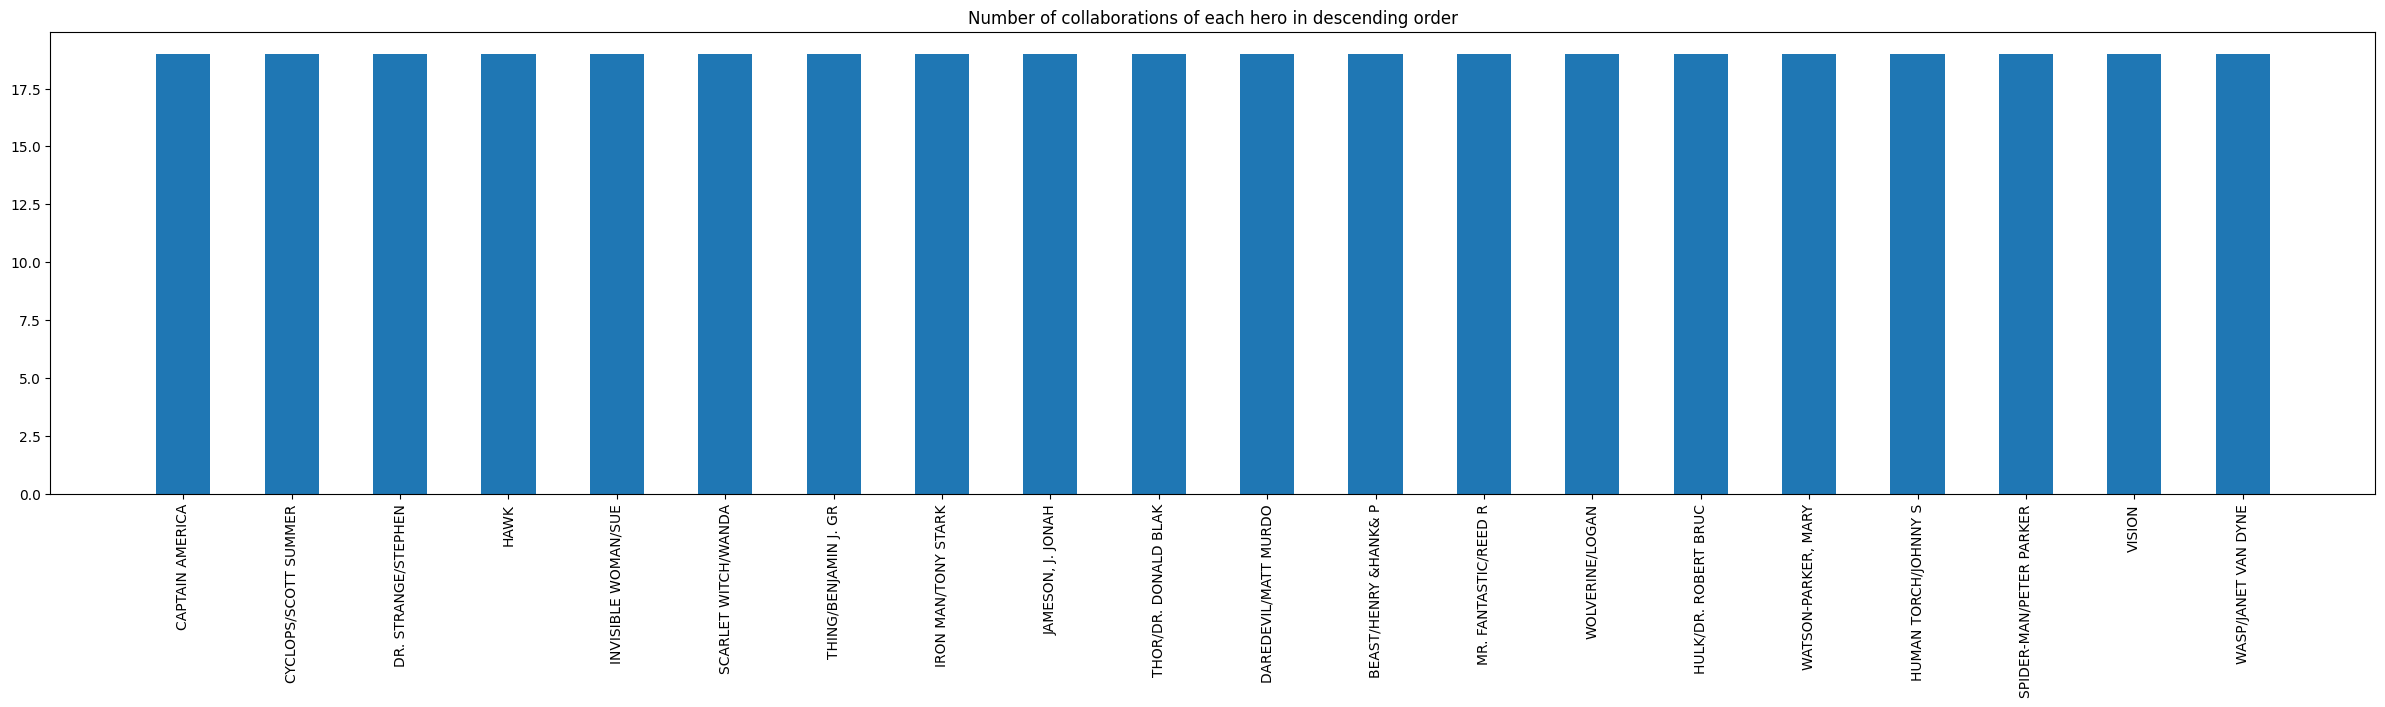

In [ ]:
visualize_features(G1_features,1)

#### Visualize Second Graph features

| Feature | Values |
| ------- | ------- |
| Number_of_nodes |19090|
| Density |0.0005|
| Average_degree |10|
| Is_dense |False|


| Hubs |
|-----|
|A 10|
|A 118|
|A 12|
|A 15|
|A 16|
|A 173|
|A 188|
|A 18|
|A 19|
|A 1|
|A 21|
|A 305|
|A 310|
|A3 10|
|A3 11|
|A3 1|
|A 329|
|A3 2|
|A 332|
|A3 32|
|... 257 total hubs |

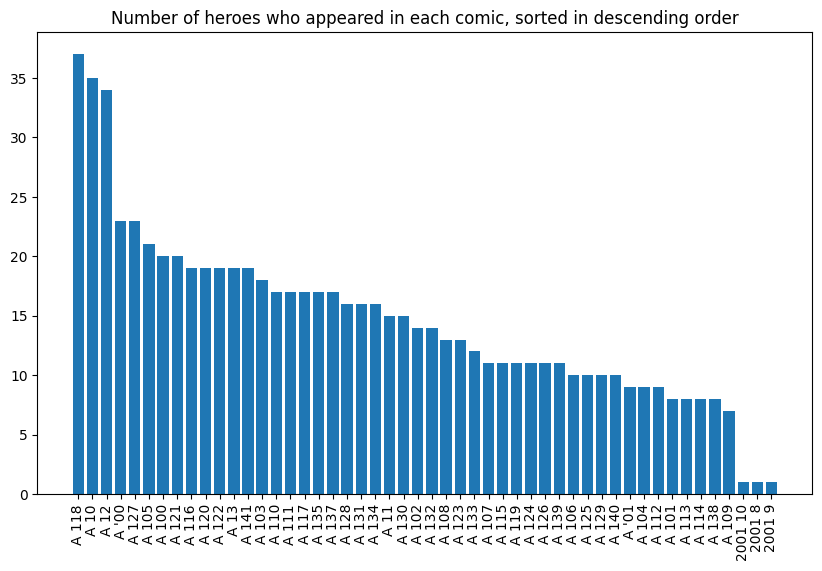

In [ ]:
visualize_features(G2_features,2)

### Visualization 2 - Visualize centrality measure

In [ ]:
def visualize_centralities(measures):
    table  = '| What | Info |\n'
    table += '| ------- | ------- |\n'
    table += '| Metric |'+ str(measures["Metrics"]) +'|\n'
    table += '| Node |'+ str(measures["Node"])+'|\n'
    table += '| Value for the node|'+ str(round(measures["Value"],4))+'|\n'
    table += "| Value for the network's average |"+ str(round(measures["Average"], 4)) +'|\n'
    display(Markdown(table))

In [ ]:
visualize_centralities(centrality)

| What | Info |
| ------- | ------- |
| Metric |ClosenessCentrality|
| Node |CAPTAIN AMERICA|
| Value for the node|0.3909|
| Value for the network's average |0.0006|


In this example the metric that we used is the Closeness Centrality. We considered the node Captain America for the graph G2 and 50 top superheroes. The closeness centrality's value for this node is 0.3909, the average for the superheroes in the netowrk is 0.0006.

### Visualization 3 - Visualize the shortest-ordered route

In [ ]:
def visualize_short_path(box):
    print(box[0])
    #Let's plot the graph
    pos = nx.planar_layout(box[1])
    nx.draw_networkx(box[1], arrowstyle = "-|>", pos = pos, connectionstyle="arc3,rad=0.1", with_labels=True, node_color=box[2], font_size = 5)
    plt.show()

{'Comics in order': ['A 118', 'A 118', "A '00", 'A 115', 'A 115', 'A 1']}


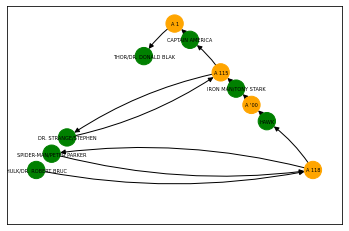

In [ ]:
visualize_short_path(short_routes)

In this case we considered the sequence h ["SPIDER-MAN/PETER PARKER", 'HAWK', "IRON MAN/TONY STARK", 'DR. STRANGE/STEPHEN', "CAPTAIN AMERICA"], the starting node h1 = 'HULK/DR. ROBERT BRUC' and the last node = "THOR/DR. DONALD BLAK" considering 50 top superheroes.

In the graph it's visible the path that a reader has to do if he want to meet the superheroes in the given order. In green there are the superheroes and in orange the comics.

First of all, starting from Hulk he will read the comic "A 118", in this it will find Spider Man and at the same time Hawk. So he will pass to "A'00" and he will find Iron Man, he will go to read "A 115" where there is Iron Man as well as Dr. Strange, here he will find Captain America too. After reading "A 1" there will be Captain America and Thor. This will be the conclusion of our path.

### Visualization 4 - Visualize the disconnected graph

For an easier representation we consider only the top 100 heroes.

In [ ]:
original_graph = graph_n(G1,100)

edges = function_4(G1,"CAPTAIN AMERICA","MR. FANTASTIC/REED R", 100, edges=True)    # Find edges to remove

new_graph = original_graph.copy()    # Create new graph with the edges removed
new_graph.remove_edges_from(edges)
pos = nx.random_layout(new_graph)

The plot shows the graph before and after removing the edges.\
The number of edges removed is displayed above.

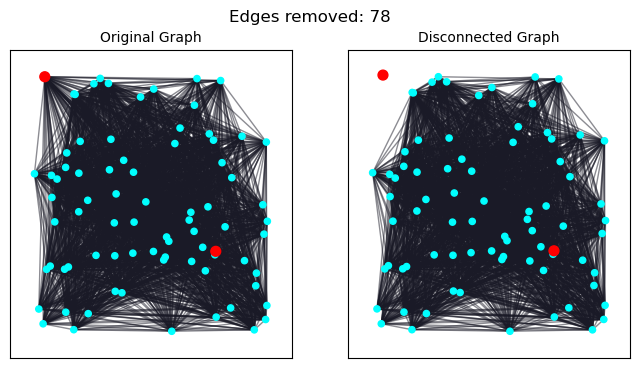

In [ ]:
fig, ax = plt.subplots(1, 2, num=1, figsize=(8,4))

# Original graph with colors
color_o = ["red" if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else "cyan" for node in list(original_graph.nodes)]
size_o = [[50 if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else 20 for node in list(original_graph.nodes)]]

plt.suptitle(f"Edges removed: {len(edges)}\n")

plt.sca(ax[0])
ax[0].set_title("Original Graph", fontsize=10)
nx.draw_networkx(original_graph, pos=pos, node_size=size_o, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=color_o)

# New disconnected graph
color_n = ["red" if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else "cyan" for node in list(new_graph.nodes)]
size_n = [[50 if node in ["CAPTAIN AMERICA","MR. FANTASTIC/REED R"] else 20 for node in list(new_graph.nodes)]]

plt.sca(ax[1])
ax[1].set_title("Disconnected Graph", fontsize=10)
nx.draw_networkx(new_graph, pos=pos, node_size=size_n, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=color_n)


### Visualization 5 - Visualize the communities

For this visualization we consider a subset of the top 1000 heroes of Graph 1.\
We chose *Captain America* and *Ironman* as input heroes:

In [ ]:
G = graph_n(G1,1000)
n,c,same = function_5(G.copy(), "CAPTAIN AMERICA", "IRON MAN/TONY STARK")

#### Number of links and communities

In [ ]:
table = '| Number of links to be removed |\n'
table += '|-----|\n'
table += '|' + str(n) + '|\n'
display(Markdown(table))

table = '| Are the input heroes in the same community? |\n'
table += '|-----|\n'
table += f"| {'Yes' if same else 'No'} |\n"
display(Markdown(table))

| Number of links to be removed |
|-----|
|6|


| Are the input heroes in the same community? |
|-----|
| Yes |


Community 1:

In [ ]:
df = pd.DataFrame(c[0], columns=["Community 1"])
df

,Community 1
0,"PAGE, KAREN"
1,OKOYE
2,GUARDIAN V/JAMES MAC
3,MS. MARVEL II/SHARON
4,"WHYTE, HARMONY (HARM"
...,...
978,CROSSBONES/BROCK BIN
979,"BYRD, SEN. HARRINGTO"
980,"TAYLOR, LEILA"
981,SILVER SABLE


Community 2:

In [ ]:
df2 = pd.DataFrame(c[1], columns=["Community 2"])
df2

,Community 2
0,"FROST, CARMILLA"
1,M'SHULLA
2,KILLRAVEN/JONATHAN R
3,SABRE
4,OLD SKULL


#### Graph Visualization

The first graph consist of the Original G graph but **colored** to **highlight the communities**.

The bigger points are the *Input heores*.\
It is plain to see that they belong to the same community, in accordance to what was found by the *function_5*.

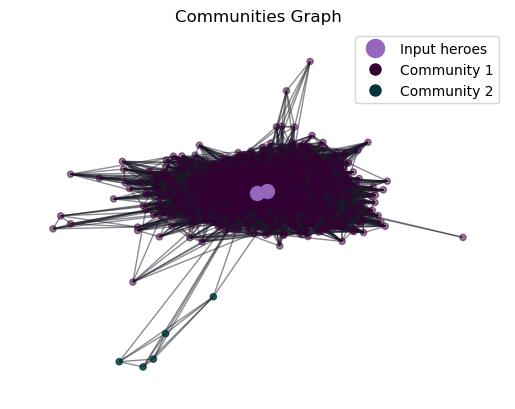

In [ ]:
color_n = [(.102,.0,.51,1) if node in ["CAPTAIN AMERICA","IRON MAN/TONY STARK"] else (.204, .0, .204,.5) if node in c[0] else (.0, .208, .225,.8) for node in G.nodes()]
size_n = [[100 if node in ["CAPTAIN AMERICA","IRON MAN/TONY STARK"] else 1 for node in list(G.nodes)]]
labels = {node:("CAPTAIN AMERICA" if node == "CAPTAIN AMERICA" else "IRON MAN" if node == "IRON MAN/TONY STARK" else "") for node in G.nodes()}
#pos = nx.spring_layout(G)


plt.title("Communities Graph")
legend = [Line2D([0],[0],marker="o", color='w' , markerfacecolor="tab:purple",label="Input heroes", markersize=15),
           Line2D([0],[0],marker="o", color='w', markerfacecolor=(.204, .0, .204, 1) , label="Community 1", markersize=10),
           Line2D([0],[0],marker="o", color='w', markerfacecolor=(.0, .208, .225, 1) , label="Community 2", markersize=10)]
plt.legend(handles=legend)
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=20, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=color_n, labels=labels)
nx.draw_networkx(G.subgraph(["CAPTAIN AMERICA","IRON MAN/TONY STARK"]), pos=pos, node_size=100, edge_color=(.102, .102, .153, .5), with_labels=False, node_color="tab:purple")

Below the single representation of each community:

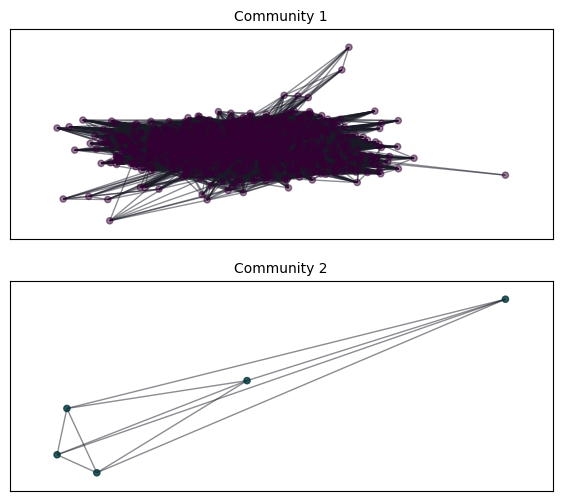

In [ ]:
fig, ax = plt.subplots(2, 1, num=1, figsize=(7,6))
#pos = nx.spring_layout(G)

# Firt community
col = [(.204, .0, .204,.5) for node in c[0]]
plt.sca(ax[0])
ax[0].invert_xaxis()
ax[0].set_title("Community 1", fontsize=10)
nx.draw_networkx(G.subgraph(c[0]), pos=pos, node_size=20, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=col)

# New disconnected graph
col_2 = [(.0, .208, .225,.8) for node in c[1]]
plt.sca(ax[1])
ax[1].invert_xaxis()
ax[1].invert_yaxis()
ax[1].set_title("Community 2", fontsize=10)
nx.draw_networkx(G.subgraph(c[1]), pos=pos, node_size=20, edge_color=(.102, .102, .153, .5), with_labels=False, node_color=col_2)

## 6. Algorithmic Question

### Grid implementation as a networkx graph
The grid 3x3 will be implemented by an undirected graph, with 9 nodes. An edge will lie between the nodes only if they are adjicient in all directions without the diagonal ones. There will be an edge also if the nodes are not adjacient but are on the same orizontal or vertical line in the grid. So in total it will have 18 edges for example if node 1 is the top left corner in the grid it will have 4 edges:
(1,2),(1,3),(1,4),(1,7).

In [ ]:
grid  = nx.Graph()
nodes= [ node for node in range(1,10) ]
pos = {}
coord = [(x,y) for x in range(3) for y in range(3)]
for i in range(9):
    pos[i+1]  = coord[i]

In [ ]:
list(map(lambda node : grid.add_node(node,pos=pos[node]),nodes)) #add node with atribute pos for correct visualization

[None, None, None, None, None, None, None, None, None]

#### Add all the edges

In [ ]:
grid.add_edge(1,2)
grid.add_edge(1,3)
grid.add_edge(1,4)
grid.add_edge(2,3)
grid.add_edge(2,5)
grid.add_edge(3,6)
grid.add_edge(4,6)
grid.add_edge(4,5)
grid.add_edge(4,7)
grid.add_edge(5,8)
grid.add_edge(5,6)
grid.add_edge(6,9)
grid.add_edge(7,8)
grid.add_edge(7,9)
grid.add_edge(8,9)
grid.add_edge(1,7)
grid.add_edge(2,8)
grid.add_edge(3,9)


#### Grid

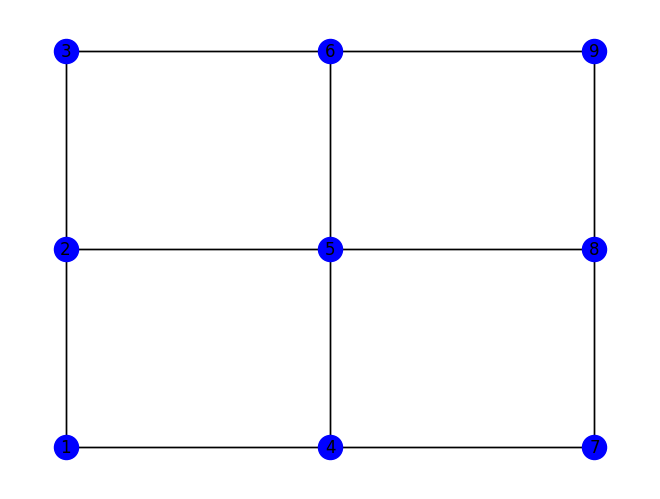

In [ ]:
#Draw the grid
nx.draw(grid, pos=pos, 
        node_color='blue', 
        with_labels=True)

#### Add 'passed' and 'moves' attributes to each edges

__'passed'__  : attribute with the nodes the pattern will cross when choosing an edge as the next move.\
example  : the edge that lies between 1 and 3 will create a pattern that crosses the node 2\
__'moves'__ :  since is an undirected graph every edge as two possible moves depending on the starting node.\
example :  the edge that lies between 1 and 2 represents two possible moves -> 1 R 2 or 2 L 1

In [ ]:
grid.edges[(1,2)]['passed']  = []
grid.edges[(1,3)]['passed']  = [2]
grid.edges[(1,4)]['passed'] = []
grid.edges[(2,3)]['passed']  = []
grid.edges[(2,5)]['passed'] = []
grid.edges[(5,6)]['passed']  =[]
grid.edges[(3,6)]['passed'] = []
grid.edges[(4,6)]['passed']  = [5]
grid.edges[(4,5)]['passed']  = []
grid.edges[(4,7)]['passed'] = []
grid.edges[(5,8)]['passed'] = []
grid.edges[(6,9)]['passed'] = []
grid.edges[(7,8)]['passed']  = []
grid.edges[(7,9)]['passed']  = [8]
grid.edges[(8,9)]['passed']  = []
grid.edges[(1,7)]['passed'] = [4]
grid.edges[(2,8)]['passed']= [5]
grid.edges[(3,9)]['passed']= [6]


In [ ]:
grid.edges[(1,2)]['moves']  = ['1R','2L']
grid.edges[(1,3)]['moves']  = ['1R','3L']
grid.edges[(1,4)]['moves'] = ['4U','1D']
grid.edges[(2,3)]['moves']  = ['2R','3L']
grid.edges[(2,5)]['moves'] = ['5U','2D']
grid.edges[(5,6)]['moves'] = ['5R','6L']

grid.edges[(3,6)]['moves'] = ['6U','3D']
grid.edges[(4,6)]['moves']  = ['4R','6L']
grid.edges[(4,5)]['moves']  = ['5L','4R']
grid.edges[(4,7)]['moves'] = ['7U','4D']
grid.edges[(5,8)]['moves'] = ['8U','5D']

grid.edges[(6,9)]['moves'] = ['9U','6D']
grid.edges[(7,8)]['moves']  = ['7R','8L']
grid.edges[(7,9)]['moves']  = ['7R','9L']
grid.edges[(8,9)]['moves']  = ['8R','9L']
grid.edges[(1,7)]['moves'] = ['1D','7U']
grid.edges[(2,8)]['moves']= ['2D','8U']
grid.edges[(3,9)]['moves']= ['3D','9U']


#### Function that counts the number of patterns created by the moves given as input starting from the node current.


In [ ]:
def check_path_from(map,current,visited,moves): #Recursive Function
    if moves == '': #Base case return 1 as a legit pattern is found because all the moves are done
        return 1
    else:
        next   = moves[1:] #Next moves to make
        partial = 0 #initialize partial pattern count 
        for edge in map.edges(current): #Loop on every edges of the current node
            data =  map.get_edge_data(*edge)
            if(edge[1] == current): #find node connected to the current node
                in_n = edge[0]
            else:
                in_n = edge[1]
            if( (str(current)+ moves[0]) in data['moves'] and in_n  not in visited): #check if the next move can take me to the node found and if it has already been visited
                update = visited[:] #create copy of visted nodes list
                if(edge[0]==current): #condition on current node
                    if( edge[1] not in update): #update visited list
                        update.append(edge[1])
                        if(data['passed'] != []): #check for node passed by the edge in the grid
                            update.append(*data['passed'])
                        partial += check_path_from(map,edge[1],update,next)
                else:  #condition on current node
                    if( edge[0] not in update):#update visited list
                        update.append(edge[0])
                        if(data['passed'] != []):  #check for node passed by the edge in the grid
                            update.append(*data['passed'])
                        partial += check_path_from(map,edge[0],update,next) #call function on next node with the next move to make 
        return partial

### Counts all the possible patterns inside the given grid

**INPUT**\
*grid* -> undirected graph representing a 3x3 grid with the attributes of the edges defined above\
*moves* -> string containing all the moves we have to make\
**OUTPUT**\
Returns the number of possible patterns that can be made with the given set of moves in the 3x3 grid\

In [ ]:
def count_patterns(grid,moves): 
    print(moves)
    cnt = 0
    for node in grid.nodes():
        visited = [node]
        cnt += check_path_from(grid,node,visited,moves)
    return cnt


### Input 1

__moves__ : 'DRU'

### Output 1

Expected output : 15

In [ ]:
count_patterns(grid,'DRU')

DRU


15

### Input 2

___moves__  : 'R'

### Output 2

Expected output : 9

In [ ]:
count_patterns(grid,'R')

R


9

### Input 3

___moves__  : 'LDRDRUL'

### Output 3

Expected output : 0

In [ ]:
count_patterns(grid,'LDRDRUL')

LDRDRUL


0